# Dust emission

`Synthesizer` has the capability of creating a dust emission spectrum using a simple energy balance approach. 

## Emission models

`Synthesizer` contains a handful of dust emission models (and will be extended with more).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from synthesizer.dust.emission import (
    Blackbody,
    Casey12,
    Greybody,
    IR_templates,
)
from unyt import Angstrom, K, Lsun, Msun

Define a wavelength grid:

In [2]:
lam = 10 ** (np.arange(3.0, 8.0, 0.01)) * Angstrom

### Blackbody

First let's explore simple blackbody models. By default a dust emission model provides a normalised spectrum.

/home/aswinpvijayan/pyvenv/astro_venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


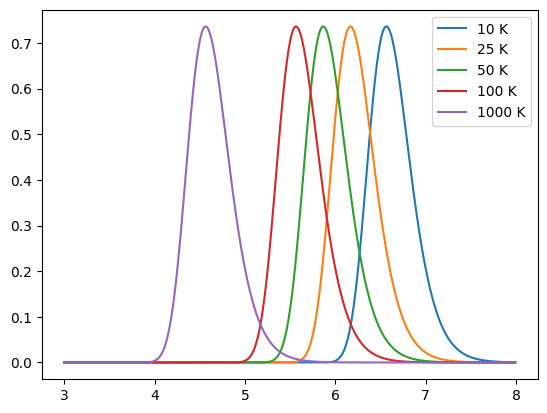

In [3]:
for T in [10, 25, 50, 100, 1000]:
    model = Blackbody(T * K)
    sed = model.get_spectra(lam)
    plt.plot(np.log10(sed.lam), sed.luminosity, label=f"{T} K")

plt.legend()
plt.show()

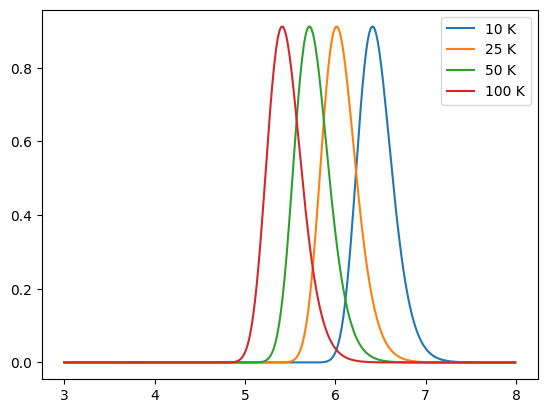

In [4]:
for T in [10, 25, 50, 100]:
    model = Greybody(T * K, 1.6)
    sed = model.get_spectra(lam)
    plt.plot(np.log10(sed.lam), sed.luminosity, label=f"{T} K")

plt.legend()
plt.show()

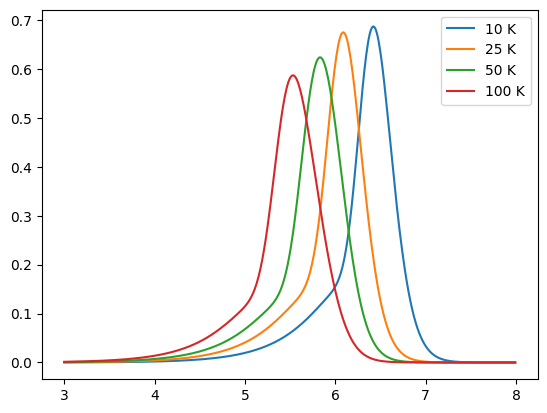

In [5]:
for T in [10, 25, 50, 100]:
    model = Casey12(T * K, 1.6, 2.0)
    sed = model.get_spectra(lam)
    plt.plot(np.log10(sed.lam), sed.luminosity, label=f"{T} K")

plt.legend()
plt.show()

Adding CMB heating to the intrinsic dust temperature of the galaxy

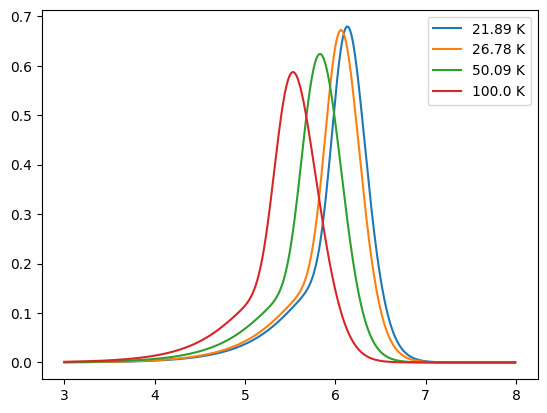

In [6]:
for T in [10, 25, 50, 100]:
    model = Casey12(T * K, 1.6, 2.0, cmb_heating=True, z=7)
    sed = model.get_spectra(lam)
    plt.plot(np.log10(sed.lam), sed.luminosity,
             label=f"{np.round(model.temperature,2)} K")

plt.legend()
plt.show()

### IR Templates - Draine & Li 2007 dust models

Begin by reading in the DL07 grids, which have been created by downlaoding the ASCII DL07 files and running 
"from synthesizer.utils import process_dl07_to_hdf5"
"process_dl07_to_hdf5()"

In [7]:
from synthesizer.grid import Grid

grid_name = "MW3.1"
grid_dir = "../../../tests/test_grid/"
grid = Grid(grid_name, grid_dir=grid_dir, read_spectra=True, read_lines=False)

In [8]:
print(grid.axes)

['qpah', 'umin', 'alpha']


Keeping dust luminosity same while varying dust mass

Using the Draine & Li 2007 dust models

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



/home/aswinpvijayan/pyvenv/astro_venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


Using the Draine & Li 2007 dust models
Using the Draine & Li 2007 dust models
Using the Draine & Li 2007 dust models
Using the Draine & Li 2007 dust models


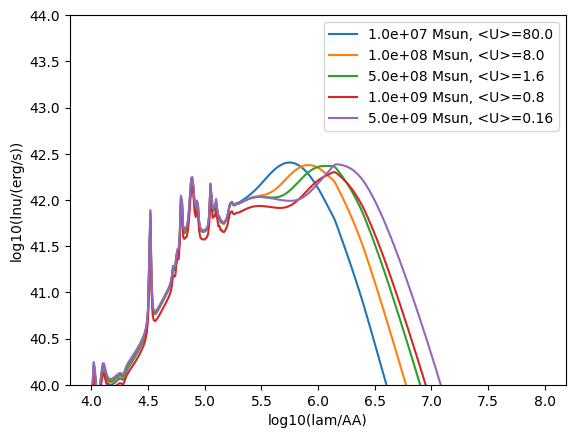

In [9]:
for mdust in [1e7, 1e8, 5e8, 1e9, 5e9]:
    model = IR_templates(
        grid, mdust=mdust * Msun, ldust=1e11 * Lsun, verbose=False
    )
    sed = model.get_spectra(lam)
    plt.plot(
        np.log10(sed.lam),
        np.log10(sed.luminosity),
        label="{:.1e} Msun, <U>={}".format(mdust, model.u_avg),
    )

plt.xlabel("log10(lam/AA)")
plt.ylabel("log10(lnu/(erg/s))")
plt.ylim(40, 44)
plt.legend()
plt.show()